In [1]:
# @author: videh.p@iitgn.ac.in : 19110192
# Midsemester of ME639

import numpy as np

#Improting Codes from other Assignments
from DHMatrix2Homo_and_Jacob import DHMatrix2Homo_and_Jacob as DH2HJ
from R2EulerAngles import R2EulerAngles as R2EA
from StanfordWrist_invkin import Stanford_invkin as StanfordWrist_invkin_general
from SCARAWrist_invkin import SCARA_invkin as SCARAWrist_invkin_general

## Question 1

In [2]:
# Standard Variables
m = 0.8 #mass of each link (kg)
I = 0.05 #moment of inertia of each link (kg*m^2)
l = 0.25 #length of each link

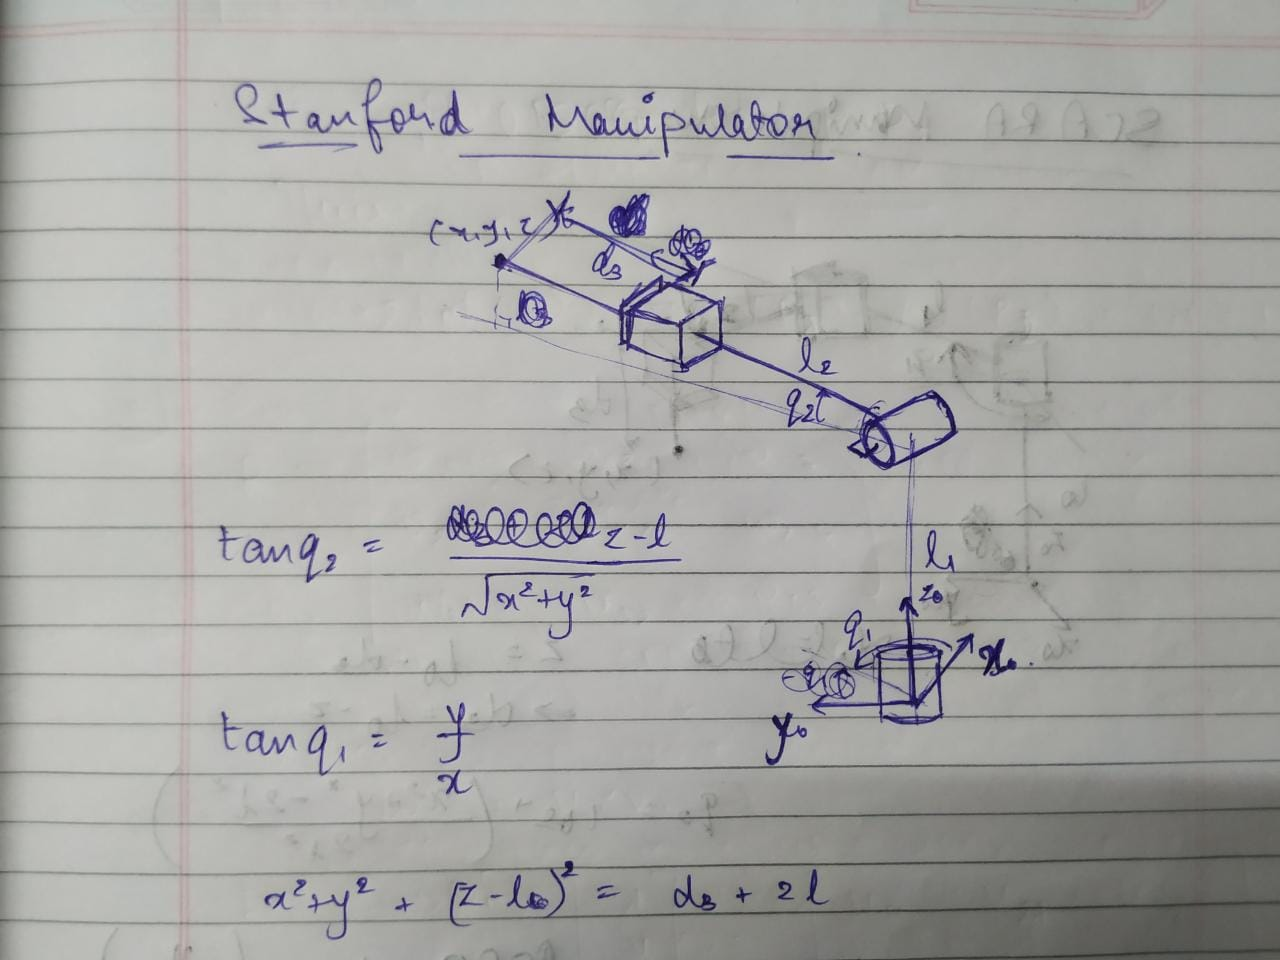

In [3]:
#Robot 1 --> Stanford Type (RRP)
def Stanford_invkin(position):
    # position: x,y,z coordinates of end effector in world frame
    x, y, z = np.array(position.T)[0]
    
    q1 = np.arctan2(y,x)
    q2 = np.arctan2(z-l, np.sqrt(x**2 + y**2))
    d3 = np.sqrt(x**2 + y**2 + (z-l)**2) - l
    if d3 < 0:
        raise('Point out of workspace') #Stops execution of code
        return None
    return np.matrix([q1,q2,d3]).T

def Stanford_forkin(q):
    # q: joint variable array/matrix/tuple for Stanford Manipulator
    #Uses DH parameter function (Assignment3) to calculate forward kinematics
    
    q1, q2, d3 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l + d3, 0, 0]])
    H,*_ = DH2HJ(Dh, [3])
    
    return H[:3,3]   #H[:3,3] = position of end effector in word frame

def Stanford_HJ(q):
    # q: joint variable array/matrix/tuple for Stanford Manipulator
    #returns homogenous transformation and jacobian for given configuration
    q1, q2, d3 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l + d3, 0, 0]])
    return DH2HJ(Dh, [3])

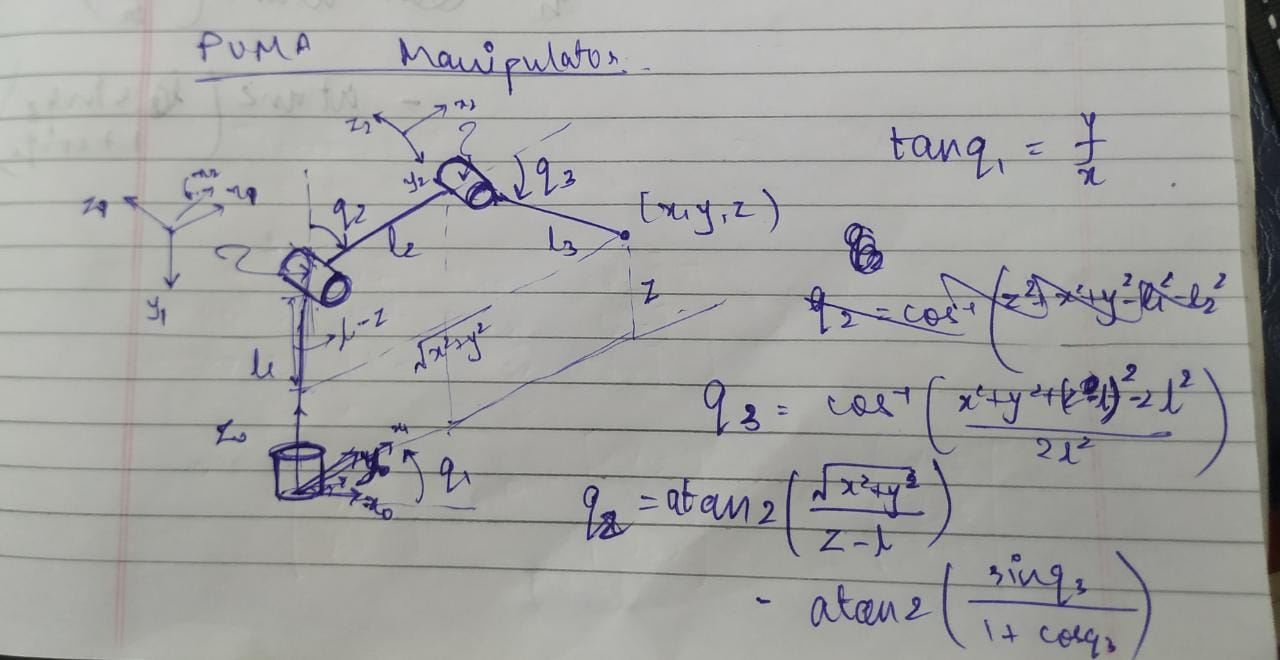

In [4]:
#Robot 2 --> PUMA Type (RRR)
def PUMA_invkin(position):
    # position: x,y,z coordinates of end effector in world frame
    x,y,z = np.array(position.T)[0]
    cos = (x**2 + y**2 + (z-l)**2 - 2*l**2)/(2*l**2)
    cos = 1 if cos>1 else cos
    cos = -1 if cos<-1 else cos

    q3 = np.arccos(cos)
    q1 = np.arctan2(y,x)
    q2 = (np.arctan2(np.sqrt(x**2+y**2),z-l) - np.arctan2(np.sin(q3),(1 + np.cos(q3))))

    return np.matrix([q1, q2, q3]).T

def PUMA_forkin(q):
    # q: joint variable array/matrix/tuple for Stanford Manipulator
    #Uses DH parameter function (Assignment3) to calculate forward kinematics
    
    q1, q2, q3 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, 0, -np.pi/2],[-np.pi/2 + q2, 0, l, 0],[q3, 0, l, 0]])
    H,*_ = DH2HJ(Dh)
    
    return H[:3,3]   #H[:3,3] = position of end effector in word frame

def PUMA_HJ(q):
    # q: joint variable array/matrix/tuple for Stanford Manipulator
    #returns homogenous transformation and jacobian for given configuration
    q1, q2, q3 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, 0, -np.pi/2],[-np.pi/2 + q2, 0, l, 0],[q3, 0, l, 0]])
    return DH2HJ(Dh)

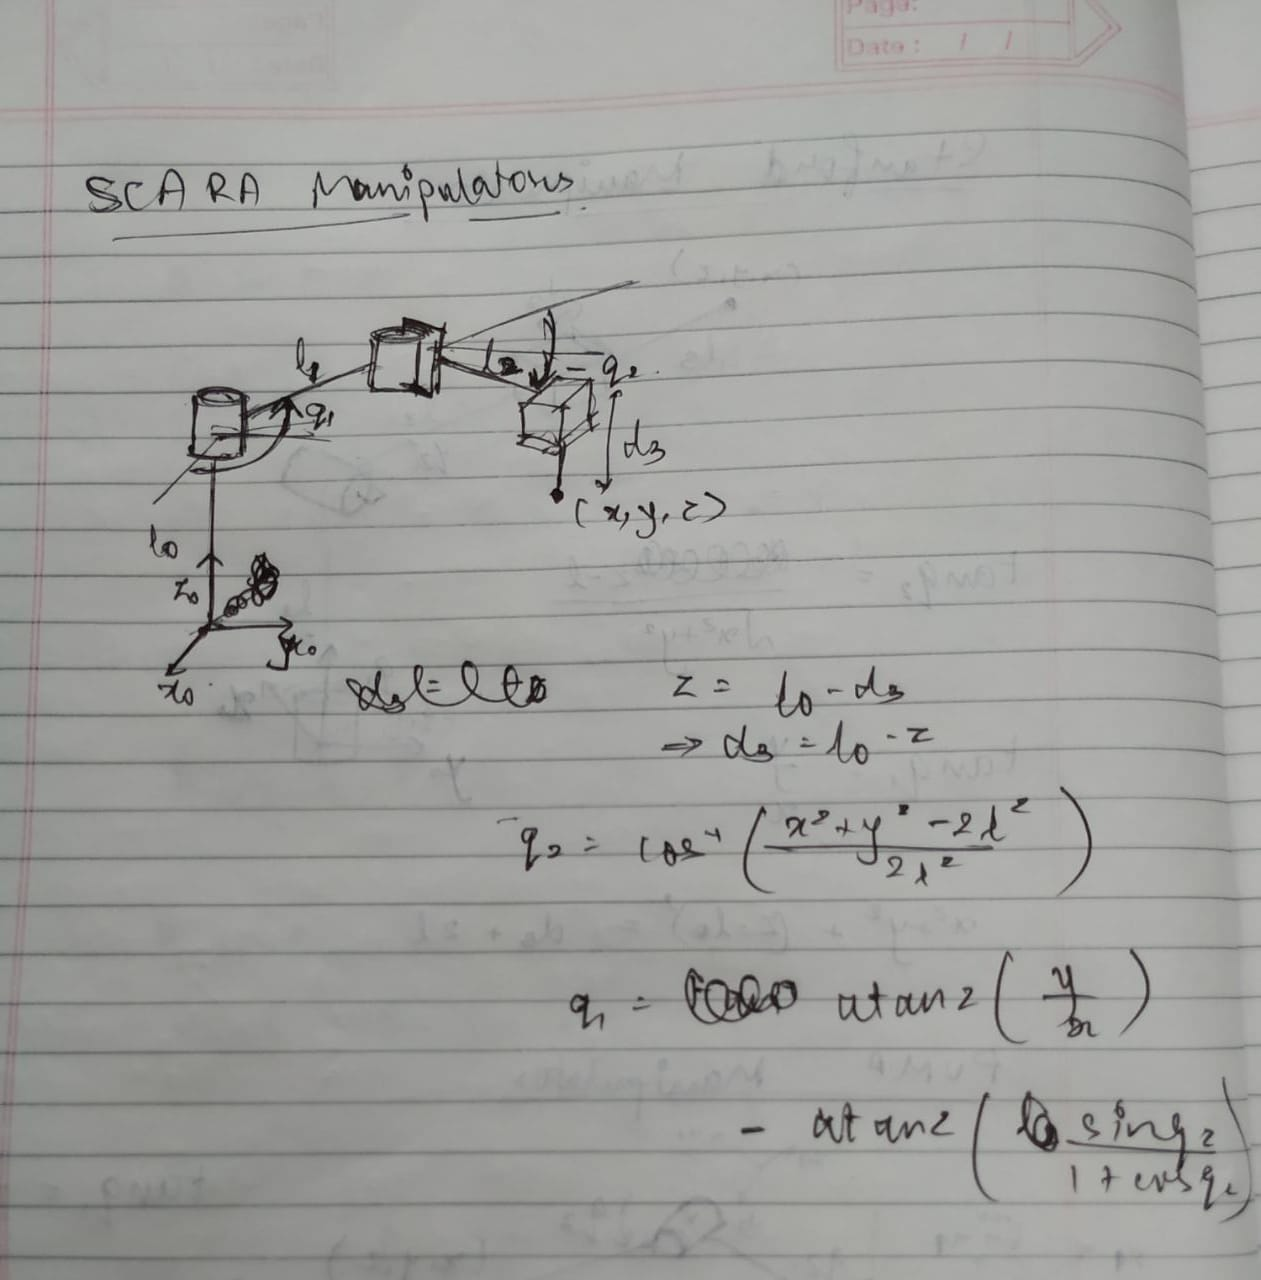

In [5]:
#Robot 3 --> SCARA Type (RRR)
def SCARA_invkin(position):
    # position: x,y,z coordinates of end effector in world frame
    x,y,z = np.array(position.T)[0]
    
    q2 = np.arccos((x*x + y*y - 2*l**2)/(2*l**2))
    q1 = np.arctan2(y,x) - np.arctan2(np.sin(q2),(1 + np.cos(q2)))
    d3 = -z + l

    if d3 < 0:
        raise('Point out of workspace') #Stops execution of code
    
    return np.matrix([q1,q2,d3]).T

def SCARA_forkin(q):
    # q: joint variable array/matrix/tuple for Stanford Manipulator
    #Uses DH parameter function (Assignment3) to calculate forward kinematics
    
    q1, q2, d3 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, l, 0],[q2, 0, l, np.pi],[0, d3, 0, 0]])
    H,*_ = DH2HJ(Dh, [3])
    
    return H[:3,3]   #H[:3,3] = position of end effector in word frame

def SCARA_HJ(q):
    # q: joint variable array/matrix/tuple for Stanford Manipulator
    #returns homogenous transformation and jacobian for given configuration
    q1, q2, d3 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, l, 0],[q2, 0, l, np.pi],[0, d3, 0, 0]])
    return DH2HJ(Dh, [3])

### Answer 1.A
Verifying that end points of upper surface lie in workspace

In [6]:
##Testing for each manipulator
#End Points of block
P1 = np.matrix([0.45,0.075,0.1]).T
P2 = np.matrix([0.45,-0.075,0.1]).T
P3 = np.matrix([0.25,-0.075,0.1]).T
P4 = np.matrix([0.25,0.075,0.1]).T

#Stanford
if (np.all(np.abs(Stanford_forkin(Stanford_invkin(P1)) - P1) < 1e-10)) and (np.all(np.abs(Stanford_forkin(Stanford_invkin(P2)) - P2) < 1e-10)) and (np.all(np.abs(Stanford_forkin(Stanford_invkin(P3)) - P3) < 1e-10)) and (np.all(np.abs(Stanford_forkin(Stanford_invkin(P4)) - P4) < 1e-10)):
    print('Verified Stanford')
    print('Stanford joint matrices for:')
    print('P1:', Stanford_invkin(P1))
    print('P2:', Stanford_invkin(P2))
    print('P3:', Stanford_invkin(P3))
    print('P4:', Stanford_invkin(P4))
    print()

#PUMA
if (np.all(np.abs(PUMA_forkin(PUMA_invkin(P1)) - P1) < 1e-10)) and (np.all(np.abs(PUMA_forkin(PUMA_invkin(P2)) - P2) < 1e-10)) and (np.all(np.abs(PUMA_forkin(PUMA_invkin(P3)) - P3) < 1e-10)) and (np.all(np.abs(PUMA_forkin(PUMA_invkin(P4)) - P4) < 1e-10)):
    print('Verified PUMA')
    print('PUMA joint matrices for:')
    print('P1:', PUMA_invkin(P1))
    print('P2:', PUMA_invkin(P2))
    print('P3:', PUMA_invkin(P3))
    print('P4:', PUMA_invkin(P4))
    print()
    
#SCARA
if (np.all(np.abs(SCARA_forkin(SCARA_invkin(P1)) - P1) < 1e-10)) and (np.all(np.abs(SCARA_forkin(SCARA_invkin(P2)) - P2) < 1e-10)) and (np.all(np.abs(SCARA_forkin(SCARA_invkin(P3)) - P3) < 1e-10)) and (np.all(np.abs(SCARA_forkin(SCARA_invkin(P4)) - P4) < 1e-10)):
    print('Verified SCARA')
    print('SCARA joint matrices for:')
    print('P1:', SCARA_invkin(P1))
    print('P2:', SCARA_invkin(P2))
    print('P3:', SCARA_invkin(P3))
    print('P4:', SCARA_invkin(P4))
    print()

Verified Stanford
Stanford joint matrices for:
P1: [[ 0.16514868]
 [-0.31766319]
 [ 0.23023432]]
P2: [[-0.16514868]
 [-0.31766319]
 [ 0.23023432]]
P3: [[-0.29145679]
 [-0.52160561]
 [ 0.05103986]]
P4: [[ 0.29145679]
 [-0.52160561]
 [ 0.05103986]]

Verified PUMA
PUMA joint matrices for:
P1: [[0.16514868]
 [1.60634394]
 [0.56423116]]
P2: [[-0.16514868]
 [ 1.60634394]
 [ 0.56423116]]
P3: [[-0.29145679]
 [ 1.16770893]
 [ 1.84938603]]
P4: [[0.29145679]
 [1.16770893]
 [1.84938603]]

Verified SCARA
SCARA joint matrices for:
P1: [[-0.25650258]
 [ 0.84330251]
 [ 0.15      ]]
P2: [[-0.58679993]
 [ 0.84330251]
 [ 0.15      ]]
P3: [[-1.31304106]
 [ 2.04316854]
 [ 0.15      ]]
P4: [[-0.73012748]
 [ 2.04316854]
 [ 0.15      ]]



### Answer 1.B
Writing a single code that calculates joint variables (and performs code check) for all given points for all three manipulators

In [7]:
def Manipulator_WorkspaceCheck_and_InverseKinematicsReturn(points_arr):
    #Performs WorkspaceCheck and Returns array of joint variables
    #points_arr: [A,B,C,D]:Array of points(3x1 matrices) :: performs check for each point
    #returns output_arr : [[q_Stanford_A, q_PUMA_A, q_SCARA_A],
    #                      [q_Stanford_B, q_PUMA_B, q_SCARA_B],
    #                      [q_Stanford_C, q_PUMA_C, q_SCARA_C],
    #                      [q_Stanford_D, q_PUMA_D, q_SCARA_D]] :arrays of joint variable matrices(3x1)
    
    output_arr = []
       
    for index, point in enumerate(points_arr):
        #Stanford Check
        try:
            if (np.all(np.abs(Stanford_forkin(Stanford_invkin(point)) - point) < 1e-10)):
                output_arr.append([Stanford_invkin(point)])
            else:
                output_arr.append(['Stanford Check Failed'])
        except:
            output_arr.append(['Out of Workspace'])
        
        #PUMA Check
        try:
            if (np.all(np.abs(PUMA_forkin(PUMA_invkin(point)) - point) < 1e-10)):
                output_arr[index].append(PUMA_invkin(point))
            else:
                output_arr[index].append('PUMA Check Failed')
        except:
            output_arr[index].append('Out of Workspace')
            
        #SCARA Check
        try:
            if (np.all(np.abs(SCARA_forkin(SCARA_invkin(point)) - point) < 1e-10)):
                output_arr[index].append(SCARA_invkin(point))
            else:
                output_arr[index].append('SCARA Check Failed')
        except:
            output_arr[index].append('Out of Workspace')
        
    return output_arr
            

In [8]:
#Verification of previous code
points_array = [np.matrix([0.45,0.075,0.1]).T, np.matrix([0.45,-0.075,0.1]).T, np.matrix([0.25,-0.075,0.1]).T, np.matrix([0.25,0.075,0.1]).T]
arr = Manipulator_WorkspaceCheck_and_InverseKinematicsReturn(points_array)

for ind,pt_arr in enumerate(arr):
    print('point:', points_array[ind].T)
    print('Stanford')
    print(pt_arr[0])
    print('PUMA')
    print(pt_arr[1])
    print('PUMA')
    print(pt_arr[2])
    print()

point: [[0.45  0.075 0.1  ]]
Stanford
[[ 0.16514868]
 [-0.31766319]
 [ 0.23023432]]
PUMA
[[0.16514868]
 [1.60634394]
 [0.56423116]]
PUMA
[[-0.25650258]
 [ 0.84330251]
 [ 0.15      ]]

point: [[ 0.45  -0.075  0.1  ]]
Stanford
[[-0.16514868]
 [-0.31766319]
 [ 0.23023432]]
PUMA
[[-0.16514868]
 [ 1.60634394]
 [ 0.56423116]]
PUMA
[[-0.58679993]
 [ 0.84330251]
 [ 0.15      ]]

point: [[ 0.25  -0.075  0.1  ]]
Stanford
[[-0.29145679]
 [-0.52160561]
 [ 0.05103986]]
PUMA
[[-0.29145679]
 [ 1.16770893]
 [ 1.84938603]]
PUMA
[[-1.31304106]
 [ 2.04316854]
 [ 0.15      ]]

point: [[0.25  0.075 0.1  ]]
Stanford
[[ 0.29145679]
 [-0.52160561]
 [ 0.05103986]]
PUMA
[[0.29145679]
 [1.16770893]
 [1.84938603]]
PUMA
[[-0.73012748]
 [ 2.04316854]
 [ 0.15      ]]



### Answer 1.C
Getting joint paramaters for 5cm x 5cm square

In [9]:
#Using the points given in question : to trace out 5cm x 5cm square
A = np.matrix([0.40,0.06,0.1]).T
B = np.matrix([0.40,0.01,0.1]).T
C = np.matrix([0.35,0.01,0.1]).T
D = np.matrix([0.35,0.06,0.1]).T
points_array = [A, B, C, D]
arr = Manipulator_WorkspaceCheck_and_InverseKinematicsReturn(points_array)

for ind,pt_arr in enumerate(arr):
    print('point:', points_array[ind].T)
    print('Stanford')
    print(pt_arr[0])
    print('PUMA')
    print(pt_arr[1])
    print('PUMA')
    print(pt_arr[2])
    print()

point: [[0.4  0.06 0.1 ]]
Stanford
[[ 0.14888995]
 [-0.35512835]
 [ 0.18139309]]
PUMA
[[0.14888995]
 [1.39588337]
 [1.06008263]]
PUMA
[[-0.47954266]
 [ 1.25686521]
 [ 0.15      ]]

point: [[0.4  0.01 0.1 ]]
Stanford
[[ 0.02499479]
 [-0.35866797]
 [ 0.17731721]]
PUMA
[[0.02499479]
 [1.38351433]
 [1.09189993]]
PUMA
[[-0.6180896 ]
 [ 1.28616878]
 [ 0.15      ]]

point: [[0.35 0.01 0.1 ]]
Stanford
[[ 0.02856366]
 [-0.40474408]
 [ 0.13091994]]
PUMA
[[0.02856366]
 [1.27089282]
 [1.40929518]]
PUMA
[[-0.7664351 ]
 [ 1.58999751]
 [ 0.15      ]]

point: [[0.35 0.06 0.1 ]]
Stanford
[[ 0.16977827]
 [-0.39967446]
 [ 0.13548671]]
PUMA
[[0.16977827]
 [1.28004263]
 [1.3808563 ]]
PUMA
[[-0.61121983]
 [ 1.56199621]
 [ 0.15      ]]



### Answer1.D
Calculating joint velocities to make End Effector follow the path with velocity of 1cm/s

In [10]:
#Making array of points at which we need to calculate Joint Velocities
velo_pt_arr = []
for point1, point2 in zip(points_array, points_array[1:] + [points_array[0]]):
    velo_pt_arr.append([point1 + x/5*(point2 - point1) for x in range(5)])
#Thus, velo_pt_arr is a 4x5 matrix (each element containing a 3x1 position matrix)
#First row of velo_pt_arr contains points on A-->B at a distance of 1cm
#Second row of velo_pt_arr contains points on B-->C at a distance of 1cm
#Third row of velo_pt_arr contains points on C-->D at a distance of 1cm
#Fourth column of velo_pt_arr contains points on D-->A at a distance of 1cm

#Array containing end_effector velocity values at each row of velo_pt_arr 
velo_arr = [(point2- point1)/5 for point1, point2 in zip(points_array, points_array[1:] + [points_array[0]])] #4 value array with velocity at each square edge 
velo_arr = [item for item in velo_arr for i in range(5)] #20 value array containing velocity at each point

#Flattened array of velocity points : Will be used later, at the time of showing output
velo_pt_arr_flat = [pt for common_velo_pt_arr in velo_pt_arr for pt in common_velo_pt_arr]

In [11]:
#Functions to return joint velocities
def JointVelocities_Stanford(position, velocity):
    #position: end_effector position at which desired velocity is to be achieved 
    #velocity: desired velocity of end_effector
    #returns the joint velocities
    ##For Stanford Type Manipulator
    
    q = Stanford_invkin(position)
    H, J = Stanford_HJ(q)
    Jv = J[:3,:]
    
    return np.linalg.pinv(Jv)@velocity  #psuedo-inverse of J = np.linalg.pinv(J)

def JointVelocities_PUMA(position, velocity):
    #position: end_effector position at which desired velocity is to be achieved 
    #velocity: desired velocity of end_effector
    #returns the joint velocities
    ##For PUMA Type Manipulator
    
    q = PUMA_invkin(position)
    H, J = PUMA_HJ(q)
    Jv = J[:3,:]
    
    return np.linalg.pinv(Jv)@velocity  #psuedo-inverse of J = np.linalg.pinv(J)

def JointVelocities_SCARA(position, velocity):
    #position: end_effector position at which desired velocity is to be achieved 
    #velocity: desired velocity of end_effector
    #returns the joint velocities
    ##For SCARA Type Manipulator
    
    q = SCARA_invkin(position)
    H, J = SCARA_HJ(q)
    Jv = J[:3,:]
    
    return np.linalg.pinv(Jv)@velocity  #psuedo-inverse of J = np.linalg.pinv(J)

In [12]:
#For Stanford Manipulator
print('For Stanford Manipulator_________________________')
Joint_velo_Stanford = []
for velo,velo_pt in zip(velo_arr, velo_pt_arr_flat):
    Joint_velo_Stanford.append(JointVelocities_Stanford(velo_pt, velo))

for pt, joint_velo in zip(velo_pt_arr_flat, Joint_velo_Stanford):
    print('point')
    print(pt)
    print('joint velocities')
    print(joint_velo)
    print()

For Stanford Manipulator_________________________
point
[[0.4 ]
 [0.06]
 [0.1 ]]
joint velocities
[[-0.02444988]
 [-0.00119565]
 [-0.00139084]]

point
[[0.4 ]
 [0.05]
 [0.1 ]]
joint velocities
[[-0.02461538]
 [-0.00100569]
 [-0.00116248]]

point
[[0.4 ]
 [0.04]
 [0.1 ]]
joint velocities
[[-0.02475248]
 [-0.00081073]
 [-0.00093225]]

point
[[0.4 ]
 [0.03]
 [0.1 ]]
joint velocities
[[-0.02486016]
 [-0.0006117 ]
 [-0.00070052]]

point
[[0.4 ]
 [0.02]
 [0.1 ]]
joint velocities
[[-0.02493766]
 [-0.00040955]
 [-0.00046765]]

point
[[0.4 ]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00062461]
 [-0.00821211]
 [-0.00936073]]

point
[[0.39]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00065703]
 [-0.00858333]
 [-0.00933078]]

point
[[0.38]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00069204]
 [-0.00897893]
 [-0.00929877]]

point
[[0.37]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00072993]
 [-0.00940096]
 [-0.00926449]]

point
[[0.36]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00077101]
 [-0.00985165]
 [-0.00922774]]



In [13]:
#For PUMA Manipulator
print('For PUMA Manipulator_________________________')
Joint_velo_PUMA = []
for velo,velo_pt in zip(velo_arr, velo_pt_arr_flat):
    Joint_velo_PUMA.append(JointVelocities_PUMA(velo_pt, velo))

for pt, joint_velo in zip(velo_pt_arr_flat, Joint_velo_PUMA):
    print('point')
    print(pt)
    print('joint velocities')
    print(joint_velo)
    print()

For PUMA Manipulator_________________________
point
[[0.4 ]
 [0.06]
 [0.1 ]]
joint velocities
[[-0.02444988]
 [-0.00430644]
 [ 0.01100418]]

point
[[0.4 ]
 [0.05]
 [0.1 ]]
joint velocities
[[-0.02461538]
 [-0.00355392]
 [ 0.00911922]]

point
[[0.4 ]
 [0.04]
 [0.1 ]]
joint velocities
[[-0.02475248]
 [-0.00282081]
 [ 0.00726307]]

point
[[0.4 ]
 [0.03]
 [0.1 ]]
joint velocities
[[-0.02486016]
 [-0.00210277]
 [ 0.00542893]]

point
[[0.4 ]
 [0.02]
 [0.1 ]]
joint velocities
[[-0.02493766]
 [-0.0013958 ]
 [ 0.0036107 ]]

point
[[0.4 ]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00062461]
 [-0.02784406]
 [ 0.07211235]]

point
[[0.39]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00065703]
 [-0.02541994]
 [ 0.06800654]]

point
[[0.38]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00069204]
 [-0.02329756]
 [ 0.06455298]]

point
[[0.37]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00072993]
 [-0.02139524]
 [ 0.06159239]]

point
[[0.36]
 [0.01]
 [0.1 ]]
joint velocities
[[ 0.00077101]
 [-0.01965539]
 [ 0.05901409]]

poin

In [14]:
#For SCARA Manipulator
print('For SCARA Manipulator_________________________')
Joint_velo_SCARA = []
for velo,velo_pt in zip(velo_arr, velo_pt_arr_flat):
    Joint_velo_SCARA.append(JointVelocities_SCARA(velo_pt, velo))

for pt, joint_velo in zip(velo_pt_arr_flat, Joint_velo_SCARA):
    print('point')
    print(pt)
    print('joint velocities')
    print(joint_velo)
    print()

For SCARA Manipulator_________________________
point
[[0.4 ]
 [0.06]
 [0.1 ]]
joint velocities
[[-2.94965224e-02]
 [ 1.00932894e-02]
 [-1.97215226e-33]]

point
[[0.4 ]
 [0.05]
 [0.1 ]]
joint velocities
[[-2.88085240e-02]
 [ 8.38627869e-03]
 [-3.94430453e-33]]

point
[[0.4 ]
 [0.04]
 [0.1 ]]
joint velocities
[[-2.80991475e-02]
 [ 6.69334447e-03]
 [-9.86076132e-34]]

point
[[0.4 ]
 [0.03]
 [0.1 ]]
joint velocities
[[-2.73657191e-02]
 [ 5.01111508e-03]
 [ 4.93038066e-33]]

point
[[0.4 ]
 [0.02]
 [0.1 ]]
joint velocities
[[-2.66059546e-02]
 [ 3.33659738e-03]
 [-3.94430453e-33]]

point
[[0.4 ]
 [0.01]
 [0.1 ]]
joint velocities
[[-0.03271684]
 [ 0.0666829 ]
 [ 0.        ]]

point
[[0.39]
 [0.01]
 [0.1 ]]
joint velocities
[[-0.03130894]
 [ 0.06393193]
 [ 0.        ]]

point
[[0.38]
 [0.01]
 [0.1 ]]
joint velocities
[[-3.00847571e-02]
 [ 6.15535973e-02]
 [-3.94430453e-33]]

point
[[0.37]
 [0.01]
 [0.1 ]]
joint velocities
[[-2.90074199e-02]
 [ 5.94746937e-02]
 [-7.88860905e-33]]

point
[[0.36]


In [15]:
##Verification
#Multiplying Jacobians at respective positions with the calculated joint velocities

check = True
#Stanford
for pt, q_dot, velo in zip(velo_pt_arr_flat, Joint_velo_Stanford, velo_arr):
    q = Stanford_invkin(pt)
    H, J = Stanford_HJ(q)
    
    if np.all((J[:3,:]@q_dot) - velo < 1e-10):
        pass
    else:
        print(pt, (J[:3,:]@q_dot), velo)
        check = False
        break
if check:
    print('Velocity Calculations for Stanford: Verified')
    
#PUMA
for pt, q_dot, velo in zip(velo_pt_arr_flat, Joint_velo_PUMA, velo_arr):
    q = PUMA_invkin(pt)
    H, J = PUMA_HJ(q)
    
    if np.all((J[:3,:]@q_dot) - velo < 1e-10):
        pass
    else:
        print(pt, (J[:3,:]@q_dot), velo)
        check = False
        break
if check:
    print('Velocity Calculations for PUMA: Verified')

#SCARA
for pt, q_dot, velo in zip(velo_pt_arr_flat, Joint_velo_SCARA, velo_arr):
    q = SCARA_invkin(pt)
    H, J = SCARA_HJ(q)
    
    if np.all((J[:3,:]@q_dot) - velo < 1e-10):
        pass
    else:
        print(pt, (J[:3,:]@q_dot), velo)
        check = False
        break
if check:
    print('Velocity Calculations for SCARA: Verified')

Velocity Calculations for Stanford: Verified
Velocity Calculations for PUMA: Verified
Velocity Calculations for SCARA: Verified


#### Comment on joint velocities
Thus, as it is evident from the joint velocity matrices, it is **not necessary** for joint velocities to be constant.

This happens as the given manipulators __have revolute joints__ too. If it had been only prismatic joints, we would see that for a constant velocity motion of end-effector, respective joint velocities will be constant.

Any constant joint velocity in a revolute joint does not correspond to constant velocity for end-effector. This is due to the fact that revolute joints have rotational motion.

### Answer1.E & Answer1.F

In [16]:
#Inverse Kinematics functions with Wrist
def StanfordWrist_invkin(position):
    #position: End Effector Position
    #Always keeps the end effector perpendicular to the surface
    #returns joint variables for the Stanford manipulator with given parameters
    #Uses code from previous assignment
    T = np.concatenate((np.matrix([[-1,0,0],[0,1,0],[0,0,-1],[1,1,1]]),np.concatenate((position, [[1]]))), axis = 1)
    
    return np.matrix(StanfordWrist_invkin_general(T, [l, l, 0, 0, 0.05])).T

def SCARAWrist_invkin(position):
    #position: End Effector Position
    #Always keeps the end effector perpendicular to the surface
    #returns joint variables for the SCARA manipulator with given parameters
    #Uses code from previous assignment
    T = np.concatenate((np.matrix([[-1,0,0],[0,1,0],[0,0,-1],[1,1,1]]),np.concatenate((position, [[1]]))), axis = 1)
    
    return np.matrix(SCARAWrist_invkin_general(T, [l, l, l, 0, 0, 0.05])).T

def PUMAWrist_invkin(position):
    #position: End Effector Position
    #Always keeps the end effector perpendicular to the surface
    #returns joint variables for the PUMA manipulator with given parameters
    R = np.matrix([[-1,0,0],[0,1,0],[0,0,-1]])
    
    #Position of wrist centre
    p = position - (0.05)*(R@np.matrix([[0], [0], [1]])) 
    
    #first three angles
    q123 = PUMA_invkin(p)
    
    #last three angles
    H_,J_ = PUMA_HJ(q123)
    R3_0 = H_[:3,:3]
    R6_3 = np.linalg.inv(R3_0)@R  
    q456 = np.matrix(R2EA(R6_3)).T
    
    q1,q2,q3 = np.array(q123.T)[0]
    q4,q5,q6 = np.array(q456.T)[0]
    
    return np.matrix([q1,q2,q3,q4,q5,q6]).T

In [17]:
#Forward Kinematics functions with Wrist
def StanfordWrist_forkin(q):
    q1, q2, d3, q4, q5, q6 = np.array(q.T)[0]
    
    l1, l2, l4, l5, l6 = [l, l, 0, 0, 0.05]
    Dh = np.matrix([[q1, l1, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l2 + d3 + l4, 0, 0],[q4,0,0,-np.pi/2],[q5,0,0,np.pi/2],[q6, l5+l6, 0,0]])
    H,*_ = DH2HJ(Dh, [3])
    
    return H[:3,3]

def SCARAWrist_forkin(q):
    q1, q2, d3, q4, q5, q6 = np.array(q.T)[0]
    
    l0, l1, l2, l4, l5, l6 = [l, l, l, 0, 0, 0.05]
    Dh = np.matrix([[q1, 0, l1, 0],[q2, 0, l2, np.pi],[0, d3+l4, 0, 0],[q4, 0, 0, -np.pi/2], [q5, 0, 0, np.pi/2],[q6,l5+l6,0,0]])
    H,*_ = DH2HJ(Dh, [3])
    
    return H[:3,3]

def PUMAWrist_forkin(q):
    q1, q2, q3, q4, q5, q6 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, 0, -np.pi/2],[-np.pi/2 + q2, 0, l, 0],[q3, 0, l, 0],[q4, 0, 0, -np.pi/2], [q5, 0, 0, np.pi/2],[q6,l,0,0]])
    H,*_ = DH2HJ(Dh)
    
    return H[:3,3]

In [18]:
#H and J calculating functions with Wrist for given dimension
def StanfordWrist_HJ(q):
    q1, q2, d3, q4, q5, q6 = np.array(q.T)[0]
    
    l1, l2, l4, l5, l6 = [l, l, 0, 0, 0.05]
    Dh = np.matrix([[q1, l1, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l2 + d3 + l4, 0, 0],[q4,0,0,-np.pi/2],[q5,0,0,np.pi/2],[q6, l5+l6, 0,0]])
    return DH2HJ(Dh, [3])

def SCARAWrist_HJ(q):
    q1, q2, d3, q4, q5, q6 = np.array(q.T)[0]
    
    l0, l1, l2, l4, l5, l6 = [l, l, l, 0, 0, 0.05]
    Dh = np.matrix([[q1, 0, l1, 0],[q2, 0, l2, np.pi],[0, d3+l4, 0, 0],[q4, 0, 0, -np.pi/2], [q5, 0, 0, np.pi/2],[q6,l5+l6,0,0]])
    return DH2HJ(Dh, [3])

def PUMAWrist_HJ(q):
    q1, q2, q3, q4, q5, q6 = np.array(q.T)[0]
    
    Dh = np.matrix([[q1, l, 0, -np.pi/2],[-np.pi/2 + q2, 0, l, 0],[q3, 0, l, 0],[q4, 0, 0, -np.pi/2], [q5, 0, 0, np.pi/2],[q6,l,0,0]])
    return DH2HJ(Dh)

In [19]:
#Calculating joint variables for given points
StanfordWrist_joint_variables = []
PUMAWrist_joint_variables = []
SCARAWrist_joint_variables = []

points_array = points_array = [A, B, C, D]


for point in points_array:
    StanfordWrist_joint_variables.append(StanfordWrist_invkin(point))
    PUMAWrist_joint_variables.append(PUMAWrist_invkin(point))
    SCARAWrist_joint_variables.append(SCARAWrist_invkin(point))


#### Answer 1.E

In [20]:
#Calculating wrist centre position from above calculated joint parameters and verifying if it lies-
#- at a displacement of [0,0,0.05] w.r.t. the points A,B,C,D

for i in range(4):
    print("For point:", points_array[i].T,'__________________________________________')
    if np.all(np.abs(Stanford_forkin(StanfordWrist_joint_variables[i][:3,0]) - points_array[i] - np.matrix([0,0,0.05]).T)<1e-10):
        print('Calculations for Stanford Verified')
        print('Joint Variables for Stanford (q1,q2,d3):')
        print(StanfordWrist_joint_variables[i][:3,0])
        print()
    if np.all(np.abs(PUMA_forkin(PUMAWrist_joint_variables[i][:3,0]) - points_array[i] - np.matrix([0,0,0.05]).T)<1e-10):
        print('Calculations for PUMA Verified')
        print('Joint Variables for PUMA (q1,q2,q3):')
        print(PUMAWrist_joint_variables[i][:3,0])
        print()
    if np.all(np.abs(SCARA_forkin(SCARAWrist_joint_variables[i][:3,0]) - points_array[i] - np.matrix([0,0,0.05]).T)<1e-10):
        print('Calculations for SCARA Verified')
        print('Joint Variables for SCARA (q1,q2,d3):')
        print(SCARAWrist_joint_variables[i][:3,0])
        print()
    print()

For point: [[0.4  0.06 0.1 ]] __________________________________________
Calculations for Stanford Verified
Joint Variables for Stanford (q1,q2,d3):
[[ 0.14888995]
 [-0.24237376]
 [ 0.16665333]]

Calculations for PUMA Verified
Joint Variables for PUMA (q1,q2,q3):
[[0.14888995]
 [1.22743631]
 [1.17146757]]

Calculations for SCARA Verified
Joint Variables for SCARA (q1,q2,d3):
[[-0.47954266]
 [ 1.25686521]
 [ 0.1       ]]


For point: [[0.4  0.01 0.1 ]] __________________________________________
Calculations for Stanford Verified
Joint Variables for Stanford (q1,q2,d3):
[[ 0.02499479]
 [-0.24490517]
 [ 0.16243181]]

Calculations for PUMA Verified
Joint Variables for PUMA (q1,q2,q3):
[[0.02499479]
 [1.21486609]
 [1.2016708 ]]

Calculations for SCARA Verified
Joint Variables for SCARA (q1,q2,d3):
[[-0.6180896 ]
 [ 1.28616878]
 [ 0.1       ]]


For point: [[0.35 0.01 0.1 ]] __________________________________________
Calculations for Stanford Verified
Joint Variables for Stanford (q1,q2,d3):

#### Answer 1.F

In [21]:
#Calculating the homogeneous transformation for above calculated variables and checking-
# -if the tool is held perpendicular by comparing rotation part

for i in range(4):
    print("For point:", points_array[i].T,'__________________________________________')
    if np.all(StanfordWrist_HJ(StanfordWrist_joint_variables[i])[0][:3,:3] - np.matrix([[-1,0,0],[0,1,0],[0,0,-1]])< 1e-10):
        print('Angle of tool verified for Stanford Verified')
        print('Wrist angles for Stanford (q4,q5,d6):')
        print(StanfordWrist_joint_variables[i][3:,0])
        print()
    if np.all(PUMAWrist_HJ(PUMAWrist_joint_variables[i])[0][:3,:3] - np.matrix([[-1,0,0],[0,1,0],[0,0,-1]])< 1e-10):
        print('Angle of tool verified for PUMA Verified')
        print('Wrist angles for PUMA (q4,q5,d6):')
        print(PUMAWrist_joint_variables[i][3:,0])
        print()
    if np.all(SCARAWrist_HJ(SCARAWrist_joint_variables[i])[0][:3,:3] - np.matrix([[-1,0,0],[0,1,0],[0,0,-1]])< 1e-10):
        print('Angle of tool verified for SCARA Verified')
        print('Wrist angles for SCARA (q4,q5,d6):')
        print(SCARAWrist_joint_variables[i][3:,0])
        print()
    print()

For point: [[0.4  0.06 0.1 ]] __________________________________________
Angle of tool verified for Stanford Verified
Wrist angles for Stanford (q4,q5,d6):
[[3.14159265]
 [1.32842256]
 [0.14888995]]

Angle of tool verified for PUMA Verified
Wrist angles for PUMA (q4,q5,d6):
[[0.74268878]
 [1.57079633]
 [1.71968627]]

Angle of tool verified for SCARA Verified
Wrist angles for SCARA (q4,q5,d6):
[[ 0.       ]
 [ 0.       ]
 [-2.3642701]]


For point: [[0.4  0.01 0.1 ]] __________________________________________
Angle of tool verified for Stanford Verified
Wrist angles for Stanford (q4,q5,d6):
[[3.14159265]
 [1.32589116]
 [0.02499479]]

Angle of tool verified for PUMA Verified
Wrist angles for PUMA (q4,q5,d6):
[[0.72505576]
 [1.57079633]
 [1.59579112]]

Angle of tool verified for SCARA Verified
Wrist angles for SCARA (q4,q5,d6):
[[ 0.        ]
 [ 0.        ]
 [-2.47351347]]


For point: [[0.35 0.01 0.1 ]] __________________________________________
Angle of tool verified for Stanford Verifi

%reset -f #Clearing all the data from Question 1

# Question 3

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('Gait_DATA.xlsx')
x = data['X (cm)']
y = data['Y (cm)']

## Answer 3.B

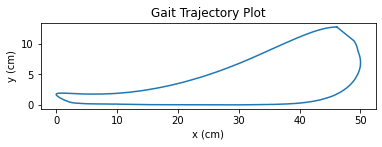

In [23]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.axis('scaled')
ax.set_title('Gait Trajectory Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

### Answer 3.C

In [24]:
#link lengths:
#Adjusted to ensure that the trajectory lies in workspace
l1 = 54.9 #Thigh Length : (cm)
l2 = 50.7 #Knee Length : (cm)

#Estimating the base height/hight of thigh joint and position (w.r.t. gait trajectory) of leg(2R Manipulator from the given data)
x0 = np.average([min(x), max(x)])
y0 = 4/5*(l1+l2) #Adjusting to include all the points of given trajectory in workspace
print('Base Height =' , y0)
print('Position of thigh joint =', 'Midpoint of gait trajectory extremities = ', x0)

Base Height = 84.48
Position of thigh joint = Midpoint of gait trajectory extremities =  25.01015625


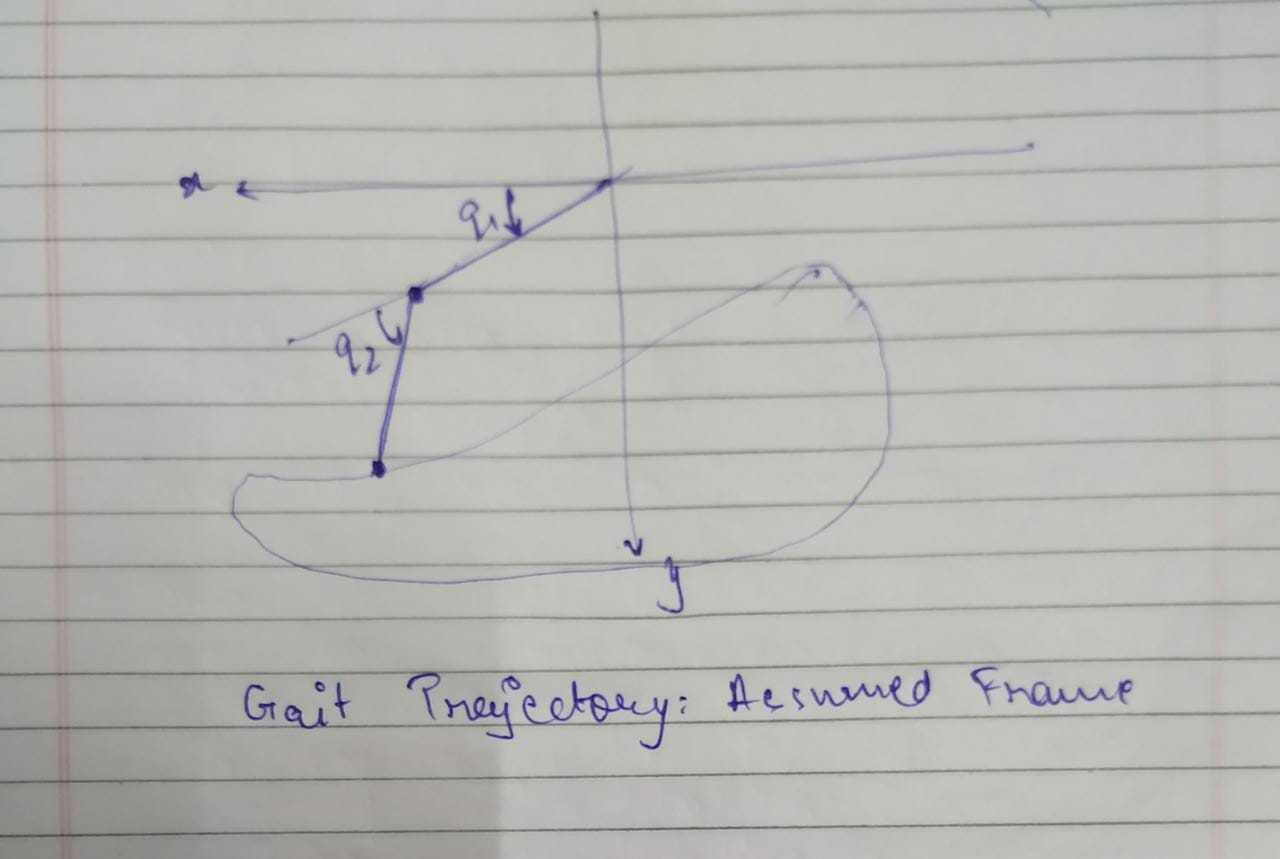

In [25]:
#Converting the given coordinates in the frame shown
x = np.array(x)
y = np.array(y)

x = -(x - x0)
y = -(y - y0)


In [26]:
# Checking if points lie in workspace
print(np.all(x**2 + y**2 <= (l1+l2)**2))
print(np.all((l2-l1)**2 <= x**2 + y**2))

True
True


In [27]:
##Inverse Kinematics of RR Manipulator
cos_values = (x*x + y*y - l1**2 - l2**2)/(2*l1*l2)
cos_values[cos_values > 1] = 1.
cos_values[cos_values < -1] = -1.

#Values of q1 and q2
q2_values = np.arccos(cos_values) 
q1_values = (np.arctan2(y,x) - np.arctan2(l2*np.sin(q2_values),(l1 + l2*np.cos(q2_values))))

In [28]:
##Forward Kinematics of RR Manipulator
#Values of calculated x and y
x_ = l1*np.cos(q1_values) + l2*np.cos(q1_values+q2_values)
y_ = l1*np.sin(q1_values) + l2*np.sin(q1_values+q2_values)
xe = abs(x-x_)
ye = abs(y-y_)

#Comparing the calculated positions
if np.all(np.abs(xe) < 1e-10) and np.all(np.abs(ye) < 1e-10):
    print('Verified the calculated joint angles successfully!')

Verified the calculated joint angles successfully!


Thus, calculated the joint parameters and **verified** them using forward kinematics.

## Note: Question 4.C submitted in a different folder
The energy of the system (plotted in graph of Answer 4.C) is not constant. We need to consider the following points for that:

1. The energy of the system will be not be constant as the motor is constantly doing work on the system.